# M/M/1/K-PS System
Es wird ein Processor-Sharing (PS) System mit begrenzter Kapazität $K$ betrachtet, bei dem sich die Jobs im System fair die Kapazität eines einzelnen Servers teilen. Der Server kann dabei maximal $K$ Jobs gleichzeitig bedienen. Falls alle $K$ Plätze im System belegt sind, werden ankommende Anforderungen abgewiesen. Es gibt also keine Wartezeit in dem System: ankommende Anforderungen werden sofort bedient, falls weniger als K Anforderungen im System sind ($x<K$); ankommende Anforderungen werden blockiert, falls $x=K$. Der Ankunftsprozess ist ein Poisson-Prozess mit Rate $\lambda$. 

Die Kapazität des Servers ist $C$. Wenn $0<i<K$ Jobs im System sind, erhält also jeder Job die Kapazität $C_i=C/i$. Die Dienstanforderung (service demand, job size) eines Jobs folgt einer exponentiellen Verteilung $B \sim Exp(\tilde{\mu})$. Wenn ein Job alleine den Server beanspruchen würde, wäre die Bedienzeit $B/C$. Als Beispiel sei $B$ die Dateigröße und $C$ die Bandbreite mit der der Server die Datei überträgt.

Das System wird in Kendall-Notation mit M/M/1/K-PS dargestellt. Alternativ kann man das System auch als M/M/K-0 Sytem mit zustandsabhängigen Bedienraten sehen.

## Analyse des Systems
Es liegt ein Markoves System vor, d.h. der Zustandsprozess hat die Markov-Eigenschaft. Als Zustand des Systems wird die Anzahl $X$ der Jobs im System betrachtet. Zur Analyse der Zustandswahrscheinlichkeiten betrachten wir zunächst die Übergangsraten des Systems. Es liegt ein Geburts- und Sterbeprozess vor. 
![Zustandsübergangsdiagramm des M/M/1/K-PS Systems](MM1K-PS.png)

Die Übergangsrate von $i$ nach $i+1$ entspricht der Ankunftsrate $\lambda$. Ein einzelner Nutzer hat im Zustand $i$ eine Bedienzeit von $B/C_i=i \cdot B/C$ mit entsprechender Bedienrate $\mu_i^* = \frac{C}{i E[B]}$. Alle Nutzer zusammen haben dann (aufgrund der Gedächntislosigkeit der exponentiellen Verteilung) die Übergangsrate $\mu_i = i\cdot \mu_i^* = \frac{C}{E[B]} = \mu$, wobei $\mu=C/E[B]$. Beim Übergang von $i$ nach $i-1$ ist die Übergangsrate unabhängig von $i$: 
$$\mu_i = \mu \quad \text{ für } i=1,\dots,K$$ 

Die Zustandswahrscheinlichkeit ist $P(X=i)=x(i)$.
Die Makrozustandsgleichungen lauten $\lambda x(i) = \mu x(i+1)$ für $i=0,\dots K-1$. Mit dem Verkehrsangebot $a=\lambda/\mu$ ist $x(i)=\lambda/\mu \cdot x(i-1)=a \cdot x(i-1) = a^i \cdot x(0)$. Die Wahrscheinlichkeit für $x(0)$ kann wie folgt berechnet werden.

$$1 = \sum_{i=0}^K x(i) = \sum_{i=0}^K a^i x(0) = x(0) \sum_{i=0}^K a^i = x(0) \frac{1-a^{K+1}}{1-a} \quad \Rightarrow \quad x(0) = \frac{1-a}{1-a^{K+1}}$$

## Blockierwahrscheinlichkeit
Aufgrund der PASTA-Eigenschaft ist die Blockierwahrscheinlichkeit 
$$p_B = x(K) = a^K x(0) = a^K \frac{1-a}{1-a^{K+1}} = \frac{a^K-a^{K+1}}{1-a^{K+1}}$$

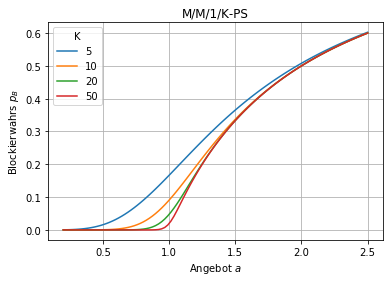

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def x0(a=1, K=10):
    return (1-a)/(1-a**(K+1))

def pb(a=1, K=10):
    return a**K*x0(a,K)

a = np.linspace(0.2, 2.5, 100)

for k in (5, 10, 20, 50):
    plt.plot(a, pb(a=a, K=k), label=k)

plt.grid()
plt.xlabel('Angebot $a$')
plt.ylabel('Blockierwahrs'' $p_B$')
plt.legend(title='K');
plt.title('M/M/1/K-PS');

## Mittlere Bedienzeit
Die mittlere Bedienzeit kann mittels des Theorems von Little hergeleitet werden. Zunächst betrachten wir die mittlere Anzahl von Jobs im System. 
$$E[X]=\sum_{i=0}^K i \cdot x(i) = \sum_{i=0}^K i \cdot a^i \cdot x(0) = x(0) \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)^2} = \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)(1-a^{K+1})}$$

Dies kann vereinfacht werden.
$$
E[X] = \frac{K+1}{a^{K+1}-1} + \frac{1}{1-a} + K
$$

Nach Little gilt $E[X] = \lambda^* \cdot E[T]$ und damit ist die mittlere Bedienzeit (=Durchlaufzeit hier) $E[T] = E[X]/\lambda^*$. Dabei ist $\lambda^*$ die Ankunftsrate nicht-blockierter Anfragen.
$$
E[T] = \frac{E[X]}{\lambda^*} = \frac{E[X]}{\lambda(1-p_B)}
$$
Daraus ergibt sich 
$$
E[T] = \frac{((a-1) K-1) a^{K+1}+a}{\lambda (1-a) \left(1-a^K\right)}
$$

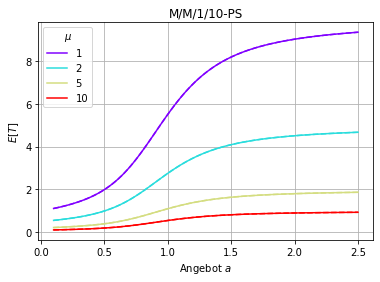

In [42]:
def ET(lam=1, mu=1, K=10): # using simplifed expression for E[T]
    a = lam/mu    
    return (a + a**(1 + K)*(-1 + (-1 + a)*K))/((-1 + a)*(-1 + a**K)*lam)

def ET2(lam=1, mu=1, K=10): # computation of the sum E[X]
    a_vec = lam/mu
    i = np.arange(0,K+1)    
    myEX = np.array([x0(a=a, K=K)*sum(i * a**i) for a in a_vec ])
    return myEX/(lam*(1-pb(a=a, K=K)))

K = 10
a = np.linspace(0.1,2.5,100)
mu_vec = (1, 2, 5, 10)

from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,len(mu_vec)))

for mu,c in zip(mu_vec,color):
    lam = a*mu    
    plt.plot(a, ET(lam=lam, mu=mu, K=K), label=mu, color=c)
    plt.plot(a, ET2(lam=lam, mu=mu, K=K), linestyle='--', color=c)

plt.grid()
plt.xlabel('Angebot $a$')
plt.ylabel('$E[T]$')
plt.legend(title='$\mu$');
plt.title(f'M/M/1/{K}-PS');